# Click-through rate (CTR) Analysis of Recruiting Emails

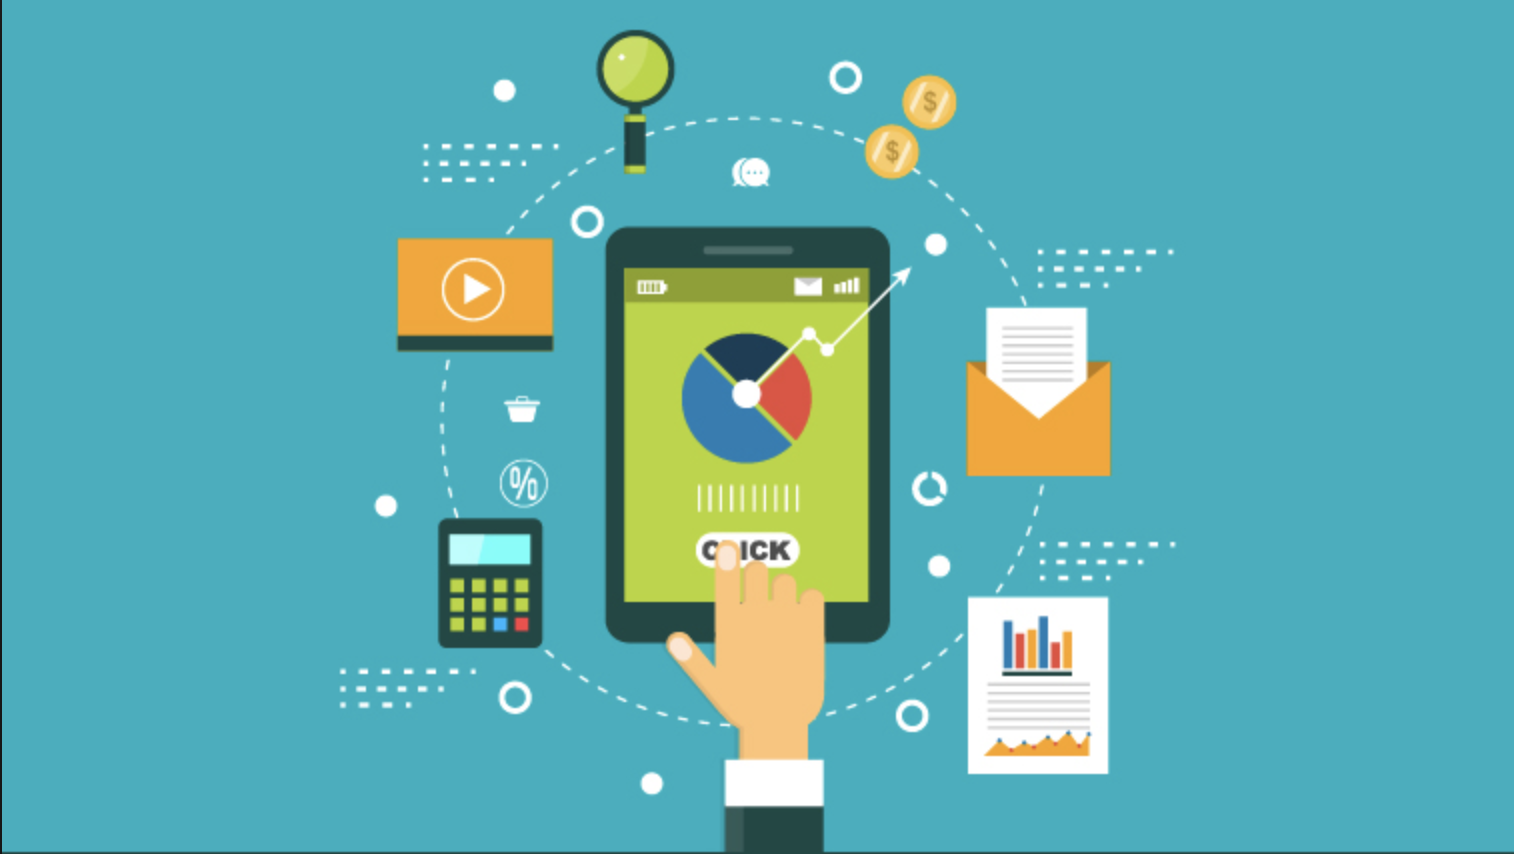

<a id='Table of Contents'></a>
## Table of Contents 
### 1. Executive Summary
### 2. <a href='#2. Methodology'>Methodology</a>
### 3. <a href='#3. Analysis & Results'>Analysis & Results</a>
### 4. <a href='#4. Recommendations'>Recommendations</a>
### 5. <a href='#5. Conclusion'>Conclusion</a>

## 1. Executive Summary
### 1.1 Which version is the best?
#### Answer: Version 2
Version 2 is the best performer showing the highest CTR across all time intervals; within a day and within a week with the CTR of 30.36% and 27.91% respectively.

It means that for every 100 users who saw the recruiting email with the design version 2 in their inbox:
* about 30.3% of users opened the email and subsequently clicked a link within a day
* about 27.9% of users opened the email and subsequently clicked a link within a week

### 1.2 Why do you think the version that won performed well? / What was the Button copy?
#### Answers:
I noticed distinctive differences between Version 2 and other versions based on CTR within a day. 

First, Version 2 has the different subject line of "Credit Karma is a Great Place to Work!" compared with the subject line of "Credit Karma is Hiring Smart People!" from other versions. This indicates that individuals tend to be more interested in the work environment or culture than the level of intelligence required at work.

Second, the variants with higher responses in the Version 2 include the first name of an individual who receives an email. This indicates that the individuals tend to show more interest in a customized email, which they might feel bonded with Credit Karma.

Lastly, surprisingly, the button copy did not differentiate between version types. I noticed that more individuals reacted to the message of "Submit Application," which implies the minimum steps that the individuals are required to go through.

The button copy is "Submit Application".

### 1.3 What percent of users open their emails within a day of sending?
#### Answer: 27.05%

<a id='2. Methodology'></a>
## 2. Methodology
#### <a href='#Table of Contents'>[Click to move to the Table of Contents]</a>
### 2.1 Data Used
* Two data sets are used in this analysis: __Raw Email Data__ and __Email Variant__
* __Raw Email Data__ has 10,000 observations and 4 features as follows:
    * `Variant`: Types of email variant
    * `Sent` : The time of an email sent to a user
    * `Opened`: The time of an email opened by a user
    * `Clicked`: The time of a call-to-action link in an email to be clicked by a user 
* __Email Variant__ has 32 observations and 5 features as follows:
    * `Variant`: Types of email variant
    * `Subject Line`: Subject lines of an email
    * `First Name`: Indicates whether or not receipient first name is included in an email
    * `Design`: Versions of email
    * `Botton`: The botton copy included in an email

### 2.2 Data Assumptions
* All users (email recipients) are independent and randomly chosen to receive an recruiting email.
* Users that did not open an email cannot click a link given in the email, meaning that the users show no record of opening the email but clicking the link are not considered for analysis.

### 2.3 Click-through-rate (CTR)
* Click-through-rate (CTR) is a Key Performance Indicator (KPI) of an analysis.
* CTR refers to the percentage of people that click on an element that they have been exposed to.
* CTR is calculated by simply dividing the number of people who clicked on a given element by the total number of visitors to that page.
* In this analysis, CTR is calculated with the users who were exposed to a link, the users who actually opened an email __AND__ clicked the link.


<a id='3. Analysis & Results'></a>
## 3. Analysis & Results
#### <a href='#Table of Contents'>[Click to move to the Table of Contents]</a>
### 3.1 Data Preprocessing

In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from datetime import date
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Print options
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [3]:
# Read in data sets
email = pd.read_excel('C:/Users/james/OneDrive/Desktop/Coding/Jupyter Notebook/Marketing_Associate_Case_Study_(Ext1).xlsx', 
                   sheet_name = 'Raw Email Data')

variant = pd.read_excel('C:/Users/james/OneDrive/Desktop/Coding/Jupyter Notebook/Marketing_Associate_Case_Study_(Ext1).xlsx', 
                   sheet_name = 'Email Variants')

In [4]:
# Print first 5 rows of each data set
display(email.head())
display(variant.head())

,Variant,Sent,Opened,Clicked
0,B4,2013-08-13 13:13:47,2013-08-13 13:13:57,0
1,E1,2013-08-13 13:13:48,2013-08-13 13:14:11,0
2,G3,2013-08-13 13:15:35,2013-08-13 13:15:56,0
3,G3,2013-08-13 13:15:49,2013-08-13 13:15:56,0
4,G3,2013-08-13 13:21:58,2013-08-13 13:22:09,0


,Variant,Subject Line,First Name,Design,Button
0,A1,Credit Karma is a Great Place to Work!,Exclude,Version 0,Apply for This Job
1,A2,Credit Karma is a Great Place to Work!,Exclude,Version 1,Apply for This Job
2,A3,Credit Karma is a Great Place to Work!,Exclude,Version 2,Apply for This Job
3,A4,Credit Karma is a Great Place to Work!,Exclude,Version 3,Apply for This Job
4,B1,Credit Karma is Hiring Smart People!,Exclude,Version 0,Apply for This Job


In [5]:
# Combine two data sets
df = email.merge(variant, how = 'left', on = 'Variant')

# Print the first 10 rows
df.head(10)

,Variant,Sent,Opened,Clicked,Subject Line,First Name,Design,Button
0,B4,2013-08-13 13:13:47,2013-08-13 13:13:57,0,Credit Karma is Hiring Smart People!,Exclude,Version 3,Apply for This Job
1,E1,2013-08-13 13:13:48,2013-08-13 13:14:11,0,Credit Karma is a Great Place to Work!,Exclude,Version 0,Submit Application
2,G3,2013-08-13 13:15:35,2013-08-13 13:15:56,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application
3,G3,2013-08-13 13:15:49,2013-08-13 13:15:56,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application
4,G3,2013-08-13 13:21:58,2013-08-13 13:22:09,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application
5,G3,2013-08-13 14:12:41,2013-08-13 14:17:44,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application
6,G3,2013-08-13 14:17:50,2013-08-13 14:18:02,2013-08-13 15:23:18,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application
7,A3,2013-08-13 14:19:53,0,0,Credit Karma is a Great Place to Work!,Exclude,Version 2,Apply for This Job
8,B3,2013-08-13 14:19:53,0,0,Credit Karma is Hiring Smart People!,Exclude,Version 2,Apply for This Job
9,E4,2013-08-13 14:19:53,2013-08-13 15:43:08,0,Credit Karma is a Great Place to Work!,Exclude,Version 3,Submit Application


In [6]:
# Look at overal information about data set: dimension, missing values, and colunm type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Variant       10000 non-null  object        
 1   Sent          10000 non-null  datetime64[ns]
 2   Opened        10000 non-null  object        
 3   Clicked       10000 non-null  object        
 4   Subject Line  10000 non-null  object        
 5   First Name    10000 non-null  object        
 6   Design        10000 non-null  object        
 7   Button        10000 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 703.1+ KB


In [7]:
# Convert string column to datetime column: Opended, Clicked
df['Opened'] = pd.to_datetime(df['Opened'], errors='coerce')
df['Clicked'] = pd.to_datetime(df['Clicked'], errors='coerce')

### 3.2 Exploratory Data Analysis (EDA)

In [8]:
# Calculate the top 5 category combinations from columns by percentage: Variant, Subject Line, First Name, Design, Button
df.loc[:, ["Variant", 
           "Subject Line", 
           "First Name", 
           "Design", 
           "Button"]].value_counts(normalize = True).mul(100).round(2).head(5)

Variant  Subject Line                            First Name  Design     Button            
A2       Credit Karma is a Great Place to Work!  Exclude     Version 1  Apply for This Job    4.11
A4       Credit Karma is a Great Place to Work!  Exclude     Version 3  Apply for This Job    4.10
A3       Credit Karma is a Great Place to Work!  Exclude     Version 2  Apply for This Job    3.92
A1       Credit Karma is a Great Place to Work!  Exclude     Version 0  Apply for This Job    3.73
E4       Credit Karma is a Great Place to Work!  Exclude     Version 3  Submit Application    3.36
dtype: float64

In [9]:
# Calculate min, max, and average time of datetime columns: Sent, Opened, Clicked
df.agg({'Sent': ['min', 'max', 'mean'],
       'Opened': ['min', 'max', 'mean'],
       'Clicked': ['min', 'max', 'mean']})

,Sent,Opened,Clicked
min,2013-08-13 13:13:47.000000000,2013-08-13 13:13:57.000000000,2013-08-13 14:22:58.000000000
max,2013-08-13 14:31:06.000000000,2013-11-28 07:45:32.000000000,2013-09-26 13:23:07.000000000
mean,2013-08-13 14:24:57.354800128,2013-08-14 21:52:11.348423936,2013-08-15 12:57:29.422839296


In [10]:
# Calculate the number of users who were sent, opened and clicked respectively
display(df.agg({'Sent': 'count','Opened': 'count', 'Clicked': 'count'}))

# Compute the percentage of users for both columns
print("% of Users who opened: ", df.agg({'Opened': 'count', 'Clicked': 'count'})[0] / len(df.Opened) * 100, "%")
print("% of Users who clicked: ", round(df.agg({'Opened': 'count', 'Clicked': 'count'})[1] / len(df.Opened) * 100, 2), "%")

Sent       10000
Opened      2982
Clicked      324
dtype: int64

% of Users who opened:  29.82 %
% of Users who clicked:  3.24 %


In [11]:
# Subset dataframe that includes users actually opened an email
sub_df = df[df['Opened'].notnull()]

# Compute click-through-rate (CTR)
print("Click-through-rate: ", round(sub_df['Clicked'].count() / sub_df['Opened'].count() * 100, 2), "%")

Click-through-rate:  10.09 %


### 3.3 Question 1: Which version is the best?
#### Answer: Version 2
Version 2 is the best performer showing the highest CTR across all time intervals; within a day and within a week with the range between 27.91% and 30.36%.

It means that for every 100 users who saw the recruiting email with the design version 2 in their inbox:
* about 30.3% of users opened and subsequently clicked a link in the email within a day
* about 27.9% of users opened and subsequently clicked a link in the email within a week

#### Definition of 'Best version'

I defined the best version as a version of an email design that has the most number of user click within a certain interval of time; within a day and within a week.
Since the time range of `Clicked` column spans over a month and a half (2013-0813 ~ 2013-09-26), I did not consider the CTR within a month for version comparions.

In [12]:
# Examine percentage of each version type
sub_df['Design'].value_counts(normalize = True).mul(100).round(2)

Version 3    26.53
Version 2    26.12
Version 1    24.04
Version 0    23.31
Name: Design, dtype: float64

In [13]:
# Compute the total number of users who clicked by version type
print("Total number of users who clicked: ", sub_df.groupby('Design')['Clicked'].value_counts().sum())
print()
print("User number break down by version type: ")
print(sub_df.groupby('Design')['Clicked'].count())

Total number of users who clicked:  301

User number break down by version type: 
Design
Version 0    73
Version 1    73
Version 2    84
Version 3    71
Name: Clicked, dtype: int64


In [14]:
# Create a customized function to compute percentage
def pct_calc (x, y):
    """Calculate the percentage of an input value"""
    z = round((x / y) * 100, 2)
    return z

# Compute the total number of users who clicked 
clk_tot = sub_df.groupby('Design')['Clicked'].value_counts().sum()

# Compute the number / percentage of users who clicked in each version type
ls_clk_val = []
for i in range(4):
    val = sub_df.groupby('Design')['Clicked'].count()[i] 
    ls_clk_val.append(val)

click = [["Version 0", pct_calc(ls_clk_val[0], clk_tot)],
        ["Version 1", pct_calc(ls_clk_val[1], clk_tot)],
        ["Version 2", pct_calc(ls_clk_val[2], clk_tot)],
        ["Version 3", pct_calc(ls_clk_val[3], clk_tot)]]

# Creat a data frame including information above
click_df = pd.DataFrame(click, columns = ["Version Type", "Overall CTR"])
display(click_df)

# Sort version type by percent of users in descending order
# display(click_df['Percent of Users'].sort_values(ascending = False))

,Version Type,Overall CTR
0,Version 0,24.25
1,Version 1,24.25
2,Version 2,27.91
3,Version 3,23.59


In [15]:
# Subset dataframe where values of Clicked column is not NaT
sub_df1 = sub_df.loc[sub_df['Clicked'].notnull()]

# Create a new column Response that shows response time in the unit of a day
sub_df1['Response'] = (sub_df1['Clicked'] - sub_df1['Sent']).dt.days

# Print the head of df1
sub_df1.head()

,Variant,Sent,Opened,Clicked,Subject Line,First Name,Design,Button,Response
6,G3,2013-08-13 14:17:50,2013-08-13 14:18:02,2013-08-13 15:23:18,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application,0
51,G3,2013-08-13 14:19:53,2013-08-13 18:04:13,2013-08-13 18:04:17,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application,0
63,A3,2013-08-13 14:19:53,2013-08-13 15:23:32,2013-08-13 19:42:00,Credit Karma is a Great Place to Work!,Exclude,Version 2,Apply for This Job,0
75,F4,2013-08-13 14:19:53,2013-08-14 19:03:39,2013-08-14 19:03:10,Credit Karma is Hiring Smart People!,Exclude,Version 3,Submit Application,1
80,A4,2013-08-13 14:19:53,2013-08-13 16:21:34,2013-08-13 16:21:43,Credit Karma is a Great Place to Work!,Exclude,Version 3,Apply for This Job,0


In [16]:
# Subset a dataframe where values of Response column less than or equal to 1
sub_df1_day = sub_df1[sub_df1['Response'] <= 1]

# Compute the total number of users who clicked within a day by version type
print("Total number of users who clicked within a day: ", sub_df1_day.groupby('Design')['Response'].value_counts().sum())
print()
print("User number break down by version type: ")
print(sub_df1_day.groupby('Design')['Response'].count())

Total number of users who clicked within a day:  247

User number break down by version type: 
Design
Version 0    59
Version 1    55
Version 2    75
Version 3    58
Name: Response, dtype: int64


In [17]:
# Compute the total number of users who clicked within a day
clk_tot_day = sub_df1_day.groupby('Design')['Response'].count().sum()

# Compute the number of users for each version type
ls_clk_val = []
for i in range(4):
    val = sub_df1_day.groupby('Design')['Response'].count()[i] 
    ls_clk_val.append(val)

# Compute percentage of users who clicked within a day = user click rate within a day
click_day = [["Version 0", pct_calc(ls_clk_val[0], clk_tot_day)], 
             ["Version 1", pct_calc(ls_clk_val[1], clk_tot_day)], 
             ["Version 2", pct_calc(ls_clk_val[2], clk_tot_day)], 
             ["Version 3", pct_calc(ls_clk_val[3], clk_tot_day)]]

# Create a dataframe
click_day_df = pd.DataFrame(click_day, columns = ["Version Type", "W/N Day CTR"])

# Merge dataframes
df_clk = click_df.merge(click_day_df, how = 'inner', on = 'Version Type')
df_clk

,Version Type,Overall CTR,W/N Day CTR
0,Version 0,24.25,23.89
1,Version 1,24.25,22.27
2,Version 2,27.91,30.36
3,Version 3,23.59,23.48


In [18]:
# Subset a dataframe where values of Response column less than or equal to 7
sub_df1_wk = sub_df1[sub_df1['Response'] <= 7]

# Compute the total number of users who clicked within a week by version type
print("Total number of users who clicked within a day: ", sub_df1_wk.groupby('Design')['Response'].value_counts().sum())
print()
print("User number break down by version type: ")
print(sub_df1_wk.groupby('Design')['Response'].count())

Total number of users who clicked within a day:  281

User number break down by version type: 
Design
Version 0    69
Version 1    64
Version 2    81
Version 3    67
Name: Response, dtype: int64


In [19]:
# Compute the total number who clicked within a week
clk_tot_wk = sub_df1_wk.groupby('Design')['Response'].count().sum()

# Compute the number of users for each version type
ls_clk_val = []
for i in range(4):
    val = sub_df1_wk.groupby('Design')['Response'].count()[i] 
    ls_clk_val.append(val)

# Compute the percentage of users who clicked within a week = user click rate within a week
click_wk = [["Version 0", pct_calc(ls_clk_val[0], clk_tot_wk)], 
            ["Version 1", pct_calc(ls_clk_val[1], clk_tot_wk)], 
            ["Version 2", pct_calc(ls_clk_val[2], clk_tot_wk)], 
            ["Version 3", pct_calc(ls_clk_val[3], clk_tot_wk)]]

# Create a dataframe
click_wk_df = pd.DataFrame(click_wk, columns = ["Version Type", "W/N Week CTR"])

# Merge dataframes and compute the average CTR by version type
df_clk = df_clk.merge(click_wk_df, how = 'inner', on = 'Version Type')
df_clk['Average CTR'] = round(df_clk.mean(axis = 1), 2)

df_clk

,Version Type,Overall CTR,W/N Day CTR,W/N Week CTR,Average CTR
0,Version 0,24.25,23.89,24.56,24.23
1,Version 1,24.25,22.27,22.78,23.10
2,Version 2,27.91,30.36,28.83,29.03
3,Version 3,23.59,23.48,23.84,23.64


In [26]:
# Rename columns for tranformation
df_clk.rename({'Overall CTR': 'Overall', 
               'W/N Day CTR': 'Day',
               'W/N Week CTR': 'Week',
               'Average CTR': 'Average'}, 
              axis = 1, 
              inplace = True)

In [27]:
# Convert a dataframe format: wide to long for visualization
df_clk_long = pd.melt(df_clk, 
                      id_vars = ['Version Type'], 
                      var_name = 'Response Time', 
                      value_name = 'Click-through-rate (%)')

In [28]:
# Barplot
fig = px.bar(df_clk_long, 
             x = 'Response Time', 
             y = 'Click-through-rate (%)', 
             color = 'Version Type',
             barmode = 'group',
             title = "Click-through-rate Comparison by Version Type and Response Time")
fig.show()

### 3.3 Question 2: Why do you think the version that won performed well? / What was the Button copy?
#### Answer: "Submit Application"

In [23]:
# Print value counts of other columns grouped by each version type
print("Version 2")
display(sub_df1_day[sub_df1_day['Design'] == 'Version 2'][["Subject Line", "First Name", "Button"]].value_counts())
print()
print("Version 0")
display(sub_df1_day[sub_df1_day['Design'] == 'Version 0'][["Subject Line", "First Name", "Button"]].value_counts())
print()
print("Version 1")
display(sub_df1_day[sub_df1_day['Design'] == 'Version 1'][["Subject Line", "First Name", "Button"]].value_counts())
print()
print("Version 3")
display(sub_df1_day[sub_df1_day['Design'] == 'Version 3'][["Subject Line", "First Name", "Button"]].value_counts())

Version 2


Subject Line                            First Name  Button            
Credit Karma is a Great Place to Work!  Include     Submit Application    14
                                                    Apply for This Job    13
                                        Exclude     Apply for This Job    12
Credit Karma is Hiring Smart People!    Exclude     Apply for This Job    10
Credit Karma is a Great Place to Work!  Exclude     Submit Application     8
Credit Karma is Hiring Smart People!    Include     Submit Application     7
                                        Exclude     Submit Application     6
                                        Include     Apply for This Job     5
dtype: int64


Version 0


Subject Line                            First Name  Button            
Credit Karma is Hiring Smart People!    Include     Submit Application    11
Credit Karma is a Great Place to Work!  Include     Submit Application    11
                                        Exclude     Submit Application    10
Credit Karma is Hiring Smart People!    Include     Apply for This Job     8
Credit Karma is a Great Place to Work!  Include     Apply for This Job     7
Credit Karma is Hiring Smart People!    Exclude     Apply for This Job     5
Credit Karma is a Great Place to Work!  Exclude     Apply for This Job     4
Credit Karma is Hiring Smart People!    Exclude     Submit Application     3
dtype: int64


Version 1


Subject Line                            First Name  Button            
Credit Karma is Hiring Smart People!    Exclude     Submit Application    9
Credit Karma is a Great Place to Work!  Include     Apply for This Job    9
Credit Karma is Hiring Smart People!    Include     Submit Application    7
Credit Karma is a Great Place to Work!  Include     Submit Application    7
Credit Karma is Hiring Smart People!    Include     Apply for This Job    6
Credit Karma is a Great Place to Work!  Exclude     Apply for This Job    6
                                                    Submit Application    6
Credit Karma is Hiring Smart People!    Exclude     Apply for This Job    5
dtype: int64


Version 3


Subject Line                            First Name  Button            
Credit Karma is Hiring Smart People!    Exclude     Submit Application    11
Credit Karma is a Great Place to Work!  Exclude     Apply for This Job    10
                                        Include     Submit Application     9
                                        Exclude     Submit Application     8
Credit Karma is Hiring Smart People!    Exclude     Apply for This Job     6
                                        Include     Submit Application     6
                                                    Apply for This Job     5
Credit Karma is a Great Place to Work!  Include     Apply for This Job     3
dtype: int64

From the results above, I noticed distinctive differences between Version 2 and other versions based on CTR within a day. 

First, Version 2 has the different subject line of "Credit Karma is a Great Place to Work!" compared with the subject line of "Credit Karma is Hiring Smart People!" from other versions. This indicates that individuals tend to be more interested in the work environment or culture than the level of intelligence required at work.

Second, the variants with higher responses in the Version 2 include the first name of an individual who receives an email. This indicates that the individuals tend to show more interest in a customized email, which they might feel bonded with Credit Karma.

Lastly, surprisingly, the button copy did not differentiate between version types. I noticed that more individuals reacted to the message of "Submit Application," which implies the minimum steps that the individuals are required to go through.

### 3.4 Question 3: What percent of users open their emails within a day of sending?
#### Answer: 27.05%

In [24]:
# Use for loop that creates two lists
# ls_response contains day difference between Opened and Sent
# ls_open contains a value of either 1 (open an email within a day) or 0 (otherwise)

ls_response = [] 
ls_open = []

for i in range(len(df)):
    
    response_time = (df['Opened'][i] - df['Sent'][i]).days
    ls_response.append(response_time)

    if ls_response[i] <= 1:
        flag = 1
    else:
        flag = 0
    
    ls_open.append(flag)

In [25]:
# Compute the percent of users open their emails within a day of sending
pct = sum(ls_open) / len(df) * 100
print('Percent of users who opened their emails within a day of sending: ', pct, '%')

Percent of users who opened their emails within a day of sending:  27.05 %


<a id='4. Recommendations'></a>
## 4. Recommendations
#### <a href='#Table of Contents'>[Click to move to the Table of Contents]</a>
To increase the click-through-rate (CTR) of the recruiting emails, I would recommend:

* Providing the subject line or adding information in the subject line that indicates a safe, positive, and excellent work environment at Credit Karma.
* Including the first name of a recipient and any related demographic information about the recipients to generate a professional bond with Credit Karma.
* Containing direct tone of messages implying the minimum process required by a recipient to induce immediate response.

<a id='5. Conclusion'></a>
## 5. Conclusion
#### <a href='#Table of Contents'>[Click to move to the Table of Contents]</a>
In this analysis, I used the CTR to analyze the recruiting emails to measure the success of Credit Karma's marketing efforts to obtain potential job candidates. I discovered that Version 2 of an email design had received the highest CTR across the all-time intervals. By analyzing the characteristics of Version 2, I strongly recommend that Credit Karma create an email subject reflecting its excellent work environment, including the recipient's first name and direct tone messages implying the minimum number of actions required.